# IMPORTING LIBRARIES  

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import sqlite3
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

# CONNECTING DATABASE

In [23]:
# Database connection
connect= sqlite3.connect('yelp.db')

In [24]:
tables = pd.read_sql_query("SELECT name from sqlite_master where type = 'table'",connect)

In [25]:
tables

,name
0,User
1,Tip
2,Business
3,Checkin
4,Review


In [26]:
# explore what type of data available in the tables
for table in tables['name']:
   display( pd.read_sql_query(f"select * from {table} limit 5",connect))

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date


In [7]:
display(pd.read_sql_query(f"select * from {table} limit 5",connect))

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


# Analysis

In [27]:
pd.read_sql_query("select count(*) from business",connect)

,count(*)
0,150346


In [28]:
pd.read_sql_query("select business_id from Business where lower(categories) like '%restaurant%'",connect)

,business_id
0,MTSW4McQd7CbVtyjqoe9mw
1,CF33F8-E6oudUQ46HnavjQ
2,k0hlBqXX-Bt0vf1op7Jr1w
3,bBDDEgkFA1Otx9Lfe7BZUQ
4,eEOYSgkmpB90uNA7lDOMRA
...,...
52281,l9eLGG9ZKpLJzboZq-9LRQ
52282,cM6V90ExQD6KMSU3rRB5ZA
52283,WnT9NIzQgLlILjPT0kEcsQ
52284,2O2K6SXPWv56amqxCECd4w


In [29]:
business_id = pd.read_sql_query("select business_id from Business where lower(categories) like '%restaurant%' and is_open = 1",connect)
business_id

,business_id
0,MTSW4McQd7CbVtyjqoe9mw
1,CF33F8-E6oudUQ46HnavjQ
2,bBDDEgkFA1Otx9Lfe7BZUQ
3,eEOYSgkmpB90uNA7lDOMRA
4,il_Ro8jwPlHresjw9EGmBg
...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg
35000,l9eLGG9ZKpLJzboZq-9LRQ
35001,cM6V90ExQD6KMSU3rRB5ZA
35002,WnT9NIzQgLlILjPT0kEcsQ


In [30]:
# WHAT IS THE DESCRIPTIVE STATE FOR REVIEW COUNT AND STAR RATING FOR BUISNESSES?
#AVG,MIN,MAX,MEDIAN

df = pd.read_sql_query( """
SELECT 
    AVG(review_count) as avg_review_count,
    MIN(review_count) as min_review_count,
    MAX(review_count) as max_review_count,
    (
        SELECT review_count
        FROM business
        ORDER BY review_count
        LIMIT 1 OFFSET (SELECT COUNT(*) FROM business) / 2
    ) as median_review_count,
    AVG(stars) as avg_star,
    MIN(stars) as min_star,
    Max(stars) as max_star,
    (
        SELECT stars
        From business
        ORDER BY stars
        Limit 1 OFFSET (SELECT COUNT(*) FROM business) / 2
    ) as median_star 
FROM business;       
""", connect)

In [31]:
df

,avg_review_count,min_review_count,max_review_count,median_review_count,avg_star,min_star,max_star,median_star
0,44.866561,5,7568,15,3.596724,1.0,5.0,3.5


In [32]:
df.transpose()

,0
avg_review_count,44.866561
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
avg_star,3.596724
min_star,1.000000
max_star,5.000000
median_star,3.500000


In [35]:
def removeoutlier(df,col):
    q1= df[col].quantile(0.25)
    q2= df[col].quantile(0.75)
    iqr= q2-q1
    lower_bound = q1-1.5* iqr
    upper_bound = q2+1.5* iqr
    df=df[(df[col]>=lower_bound) & (df[col]<= upper_bound)]
    return df

In [36]:
business_id = pd.read_sql_query("select business_id ,review_count from Business where lower(categories) like '%restaurant%' and is_open = 1",connect)
business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [38]:
buisness_id = removeoutlier(business_id , 'review_count')
buisness_id


,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34998,sf_oQ62L8UEnOOLf00nNGA,6
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [39]:
buisness_id.shape

(31537, 2)

In [40]:
df.transpose()

,0
avg_review_count,44.866561
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
avg_star,3.596724
min_star,1.000000
max_star,5.000000
median_star,3.500000


In [41]:
# checking restaurent with highest review and calculating there rating//

pd.read_sql_query(f""" SELECT name,
        SUM(review_count) as review_count,
        AVG(stars) as avg_rating
From business
where business_id in {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY review_count desc
limit 25""",connect)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,First Watch,8688,3.896552
3,Acme Oyster House,8343,4.000000
4,Taco Bell,8017,2.141813
5,Chick-fil-A,7943,3.381410
6,Oceana Grill,7400,4.000000
7,Buffalo Wild Wings,6810,2.347458
8,Panera Bread,6613,2.661905
9,Hattie B’s Hot Chicken - Nashville,6093,4.500000


In [42]:
# which restaurents have highest ratings?

pd.read_sql_query(f""" SELECT name,
        SUM(review_count) as review_count,
        AVG(stars) as avg_rating
From business
where business_id in {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY avg_rating desc
limit 10""",connect)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [43]:
# checkin_count

pd.read_sql_query("""
SELECT 
    business_id,
    SUM(LENGTH(date)-LENGTH(replace(date,',',''))+1) as checkin_count
From 
    checkin
GROUP BY business_id
order by checkin_count desc
limit 20
""",connect)

,business_id,checkin_count
0,-QI8Qi8XWH3D8y8ethnajA,52144
1,FEXhWNCMkv22qG04E83Qjg,40109
2,Eb1XmmLWyt_way5NNZ7-Pw,37562
3,c_4c5rJECZSfNgFj7frwHQ,37518
4,4i4kmYm9wgSNyF1b6gKphg,31168
5,8O35ji_yOMVJmZ6bl96yhQ,29606
6,VQcCL9PiNL_wkGf-uF3fjg,28927
7,ac1AeYqs8Z4_e2X5M3if2A,21542
8,QTbahs-GVuWYL5yfdjH34A,21487
9,ytynqOUb3hjKeJfRj5Tshw,18615


In [44]:
# tip_count

pd.read_sql_query("""
SELECT 
    business_id, count(*) as tip_count
From 
    Tip
GROUP BY business_id
order by tip_count desc
limit 20
""",connect)

,business_id,tip_count
0,FEXhWNCMkv22qG04E83Qjg,2571
1,-QI8Qi8XWH3D8y8ethnajA,1011
2,_ab50qdWOk0DdB6XOrBitw,932
3,ytynqOUb3hjKeJfRj5Tshw,827
4,Eb1XmmLWyt_way5NNZ7-Pw,826
5,c_4c5rJECZSfNgFj7frwHQ,750
6,ac1AeYqs8Z4_e2X5M3if2A,613
7,GBTPC53ZrG1ZBY3DT8Mbcw,608
8,iSRTaT9WngzB8JJ2YKJUig,606
9,GXFMD0Z4jEVZBCsbPf4CTQ,579


In [45]:
review_df = pd.read_sql_query(f"""
SELECT
    total.avg_rating as rating,
    AVG(total.review_count) as avg_review_count,
    AVG(total.checkin_count) as avg_checkin_count,
    AVG(total.tip_count) as avg_tip_count
FROM
    (SELECT
        b.business_id,
        SUM(b.review_count) as review_count,
        AVG(b.stars) as avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) as checkin_count,
        SUM(t.tip_count) as tip_count
    FROM
        business b
    LEFT JOIN
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN
        (SELECT business_id, COUNT(business_id) as tip_count 
         FROM tip 
         GROUP BY business_id) t ON b.business_id = t.business_id
    WHERE 
        b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY
        b.business_id) total
GROUP BY 
    total.avg_rating
""",connect)

review_df

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,28.677613,53.553242,4.696448
3,2.5,43.694356,92.919049,7.170221
4,3.0,63.903960,140.232167,10.522143
5,3.5,103.351377,208.645312,15.710198
6,4.0,159.216587,310.735849,23.209835
7,4.5,141.149835,214.915277,19.190083
8,5.0,38.101562,37.269621,5.472222


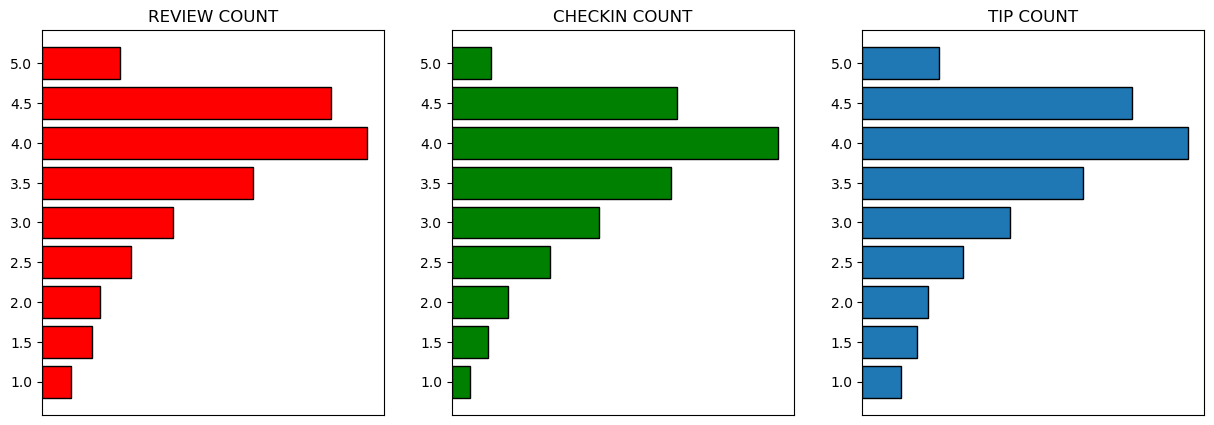

In [46]:
plt.figure(figsize = (15,5))
plt.title('Average Engagement\n\n')
#plt.xticks([])
#plt.yticks([])


plt.subplot(1,3,1)
plt.xticks([])
plt.title('REVIEW COUNT')
plt.barh(review_df['rating'].astype(str), review_df['avg_review_count'],edgecolor ='k',color='red')


plt.subplot(1,3,2)
plt.xticks([])
plt.title('CHECKIN COUNT')
plt.barh(review_df['rating'].astype(str), review_df['avg_checkin_count'],edgecolor ='k' ,color='green')


plt.subplot(1,3,3)
plt.xticks([])
plt.title('TIP COUNT')
plt.barh(review_df['rating'].astype(str), review_df['avg_tip_count'],edgecolor ='k')


plt.show()

In [48]:
R_df = pd.read_sql_query(f"""
SELECT
        b.business_id,
        SUM(b.review_count) as review_count,
        AVG(b.stars) as avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) as checkin_count,
        SUM(t.tip_count) as tip_count
    FROM
        business b
    LEFT JOIN
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN
        (SELECT business_id, COUNT(business_id) as tip_count 
         FROM tip 
         GROUP BY business_id) t ON b.business_id = t.business_id
    WHERE 
        b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY
        b.business_id
""",connect)

R_df

,business_id,review_count,avg_rating,checkin_count,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0
3,--hF_3v1JmU9nlu4zfXJ8Q,15,4.5,7.0,NaN
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0
...,...,...,...,...,...
34999,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0
35000,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0
35001,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0
35002,zznJox6-nmXlGYNWgTDwQQ,30,1.5,67.0,6.0


In [50]:
R_df = R_df.dropna()
R_df

,business_id,review_count,avg_rating,checkin_count,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0
...,...,...,...,...,...
34997,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0
34999,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0
35000,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0
35001,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0


In [51]:
R_df[['review_count','tip_count','checkin_count','avg_rating']].corr()

,review_count,tip_count,checkin_count,avg_rating
review_count,1.000000,0.837101,0.807877,0.179972
tip_count,0.837101,1.000000,0.905120,0.151821
checkin_count,0.807877,0.905120,1.000000,0.111878
avg_rating,0.179972,0.151821,0.111878,1.000000


<Axes: >

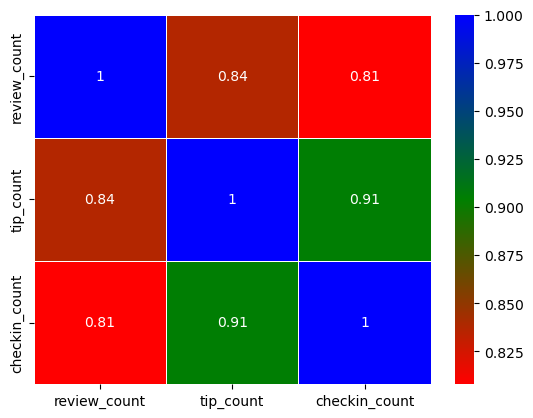

In [52]:
color = ('Red','Green','Blue')
custom_cmap = LinearSegmentedColormap.from_list ('mycmap',color)
sns.heatmap(R_df[['review_count','tip_count','checkin_count']].corr() , cmap=custom_cmap , annot = True ,linewidth = 0.5 )

In [53]:
R_df =pd.read_sql_query(f"""
SELECT
        b.business_id,
        SUM(b.review_count) as review_count,
        AVG(b.stars) as avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) as checkin_count,
        SUM(t.tip_count) as tip_count,
        (CASE
            WHEN b.stars > 3.5 THEN 'HIGH_RATED'
            WHEN b.stars > 2.5 AND b.stars <= 3.5 THEN 'AVG_RATED'
            ELSE 'LOW_RATED'
        END) as category
    FROM
        business b
    LEFT JOIN
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN
        (SELECT business_id, COUNT(business_id) as tip_count 
         FROM tip 
         GROUP BY business_id) t ON b.business_id = t.business_id
    WHERE 
        b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY
        b.business_id
""",connect)

R_df

,business_id,review_count,avg_rating,checkin_count,tip_count,category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,HIGH_RATED
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,AVG_RATED
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,AVG_RATED
3,--hF_3v1JmU9nlu4zfXJ8Q,15,4.5,7.0,NaN,HIGH_RATED
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,LOW_RATED
...,...,...,...,...,...,...
34999,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,AVG_RATED
35000,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,AVG_RATED
35001,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,HIGH_RATED
35002,zznJox6-nmXlGYNWgTDwQQ,30,1.5,67.0,6.0,LOW_RATED


In [55]:
R_df = R_df.dropna()
R_df

,business_id,review_count,avg_rating,checkin_count,tip_count,category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,HIGH_RATED
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,AVG_RATED
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,AVG_RATED
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,LOW_RATED
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0,AVG_RATED
...,...,...,...,...,...,...
34997,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0,AVG_RATED
34999,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,AVG_RATED
35000,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,AVG_RATED
35001,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,HIGH_RATED


In [56]:
print(R_df['category'].value_counts())

category
HIGH_RATED    14680
AVG_RATED     10856
LOW_RATED      5593
Name: count, dtype: int64


In [57]:
R_df.groupby('category')[['review_count','checkin_count','tip_count']].mean()

,review_count,checkin_count,tip_count
category,,,
AVG_RATED,95.479550,197.000461,13.817889
HIGH_RATED,159.326703,282.425272,20.878270
LOW_RATED,39.118005,77.526372,5.739496


In [58]:
# function to calculate the success score based on the avg rating and total review count

def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating' ]*np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score


In [59]:
# top 20 cities with most success rate of restaurant


city_df = pd.read_sql_query(f"""
SELECT
    city,
    state,
    longitude,
    latitude,
    AVG(stars) as avg_rating,
    SUM(review_count) as review_count,
    COUNT(*) as restaurant_count
From business

WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY state ,city
ORDER BY review_count DESC
LIMIT 20""", connect)

In [60]:
city_df

,city,state,longitude,latitude,avg_rating,review_count,restaurant_count
0,Philadelphia,PA,-75.155564,39.955505,3.585200,495404,3527
1,New Orleans,LA,-90.074427,29.950647,3.764009,386992,1392
2,Nashville,TN,-86.768170,36.208102,3.571089,260980,1681
3,Tampa,FL,-82.502346,27.890814,3.626972,236140,1965
4,Tucson,AZ,-111.010760,32.338572,3.460134,192649,1643
5,Indianapolis,IN,-86.127217,39.637133,3.482143,186614,1904
6,Reno,NV,-119.789339,39.476117,3.584586,151460,798
7,Santa Barbara,CA,-119.690672,34.414445,3.913677,127068,446
8,Saint Louis,MO,-90.407187,38.583223,3.502088,125866,958
9,Boise,ID,-116.206275,43.611192,3.597015,55551,603


In [63]:
#city_df['success_score'] = calculate_success_metric(city_df)

In [66]:
city_df['success_score'] = calculate_success_metric(city_df)

# Sort the DataFrame by success_score in descending order
city_df.sort_values(by='success_score', ascending=False, inplace=True)

# Display the sorted DataFrame
city_df

,city,state,longitude,latitude,avg_rating,review_count,restaurant_count,success_score
1,New Orleans,LA,-90.074427,29.950647,3.764009,386992,1392,48.428344
0,Philadelphia,PA,-75.155564,39.955505,3.585200,495404,3527,47.013195
7,Santa Barbara,CA,-119.690672,34.414445,3.913677,127068,446,45.995434
3,Tampa,FL,-82.502346,27.890814,3.626972,236140,1965,44.873566
2,Nashville,TN,-86.768170,36.208102,3.571089,260980,1681,44.539342
6,Reno,NV,-119.789339,39.476117,3.584586,151460,798,42.757246
5,Indianapolis,IN,-86.127217,39.637133,3.482143,186614,1904,42.262082
4,Tucson,AZ,-111.010760,32.338572,3.460134,192649,1643,42.105090
8,Saint Louis,MO,-90.407187,38.583223,3.502088,125866,958,41.124949
9,Boise,ID,-116.206275,43.611192,3.597015,55551,603,39.297657


In [67]:
## Tip count and review count of high rated ,avreage rated and low rated restaurant

high_rated_restaurant = pd.read_sql_query(f"""
SELECT
    review.month_year,
    review.review_count,
    tip.tip_count
FROM
    (SELECT
        strftime('%m-%Y', date) as month_year,
        COUNT(*) as review_count
     FROM review
     WHERE business_id IN {tuple(business_id['business_id'])} AND stars > 3.5
     GROUP BY month_year
     ORDER BY month_year) as review
JOIN
    (SELECT
        strftime('%m-%Y', tip.date) as month_year,
        COUNT(*) as tip_count
     FROM tip
     JOIN business as b ON tip.business_id = b.business_id
     WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars > 3.5
     GROUP BY month_year
     ORDER BY month_year) as tip
ON review.month_year = tip.month_year;
""", connect)

# Display the results
high_rated_restaurant


,month_year,review_count,tip_count
0,01-2010,3368,147
1,01-2011,5580,1116
2,01-2012,7728,2288
3,01-2013,9385,1944
4,01-2014,12828,2298
...,...,...,...
149,12-2017,23581,2491
150,12-2018,27871,2012
151,12-2019,26637,1703
152,12-2020,18858,1280


In [68]:
AVG_rated_restaurant = pd.read_sql_query(f"""
SELECT
    review.month_year,
    review.review_count,
    tip.tip_count
FROM
    (SELECT
        strftime('%m-%Y', date) as month_year,
        COUNT(*) as review_count
     FROM review
     WHERE business_id IN {tuple(business_id['business_id'])} AND stars <= 3.5 AND stars > 2.5
     GROUP BY month_year
     ORDER BY month_year) as review
JOIN
    (SELECT
        strftime('%m-%Y', tip.date) as month_year,
        COUNT(*) as tip_count
     FROM tip
     JOIN business as b ON tip.business_id = b.business_id
     WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars <= 3.5 AND b.stars > 2.5
     GROUP BY month_year
     ORDER BY month_year) as tip
ON review.month_year = tip.month_year;
""", connect)

# Display the results
AVG_rated_restaurant

,month_year,review_count,tip_count
0,01-2010,830,92
1,01-2011,1280,825
2,01-2012,1859,1546
3,01-2013,2173,1369
4,01-2014,2531,1407
...,...,...,...
149,12-2017,3582,987
150,12-2018,3960,728
151,12-2019,3697,593
152,12-2020,2039,352


In [69]:
low_rated_restaurant = pd.read_sql_query(f"""
SELECT
    review.month_year,
    review.review_count,
    tip.tip_count
FROM
    (SELECT
        strftime('%m-%Y', date) as month_year,
        COUNT(*) as review_count
     FROM review
     WHERE business_id IN {tuple(business_id['business_id'])} AND stars <= 2.5
     GROUP BY month_year
     ORDER BY month_year) as review
JOIN
    (SELECT
        strftime('%m-%Y', tip.date) as month_year,
        COUNT(*) as tip_count
     FROM tip
     JOIN business as b ON tip.business_id = b.business_id
     WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars <= 2.5
     GROUP BY month_year
     ORDER BY month_year) as tip
ON review.month_year = tip.month_year;
""", connect)

# Display the results
low_rated_restaurant

,month_year,review_count,tip_count
0,01-2010,691,13
1,01-2011,1222,140
2,01-2012,1797,275
3,01-2013,2245,273
4,01-2014,3153,300
...,...,...,...
147,12-2017,7324,228
148,12-2018,8976,187
149,12-2019,8694,160
150,12-2020,5182,79


Text(0, 0.5, 'Tip Count')

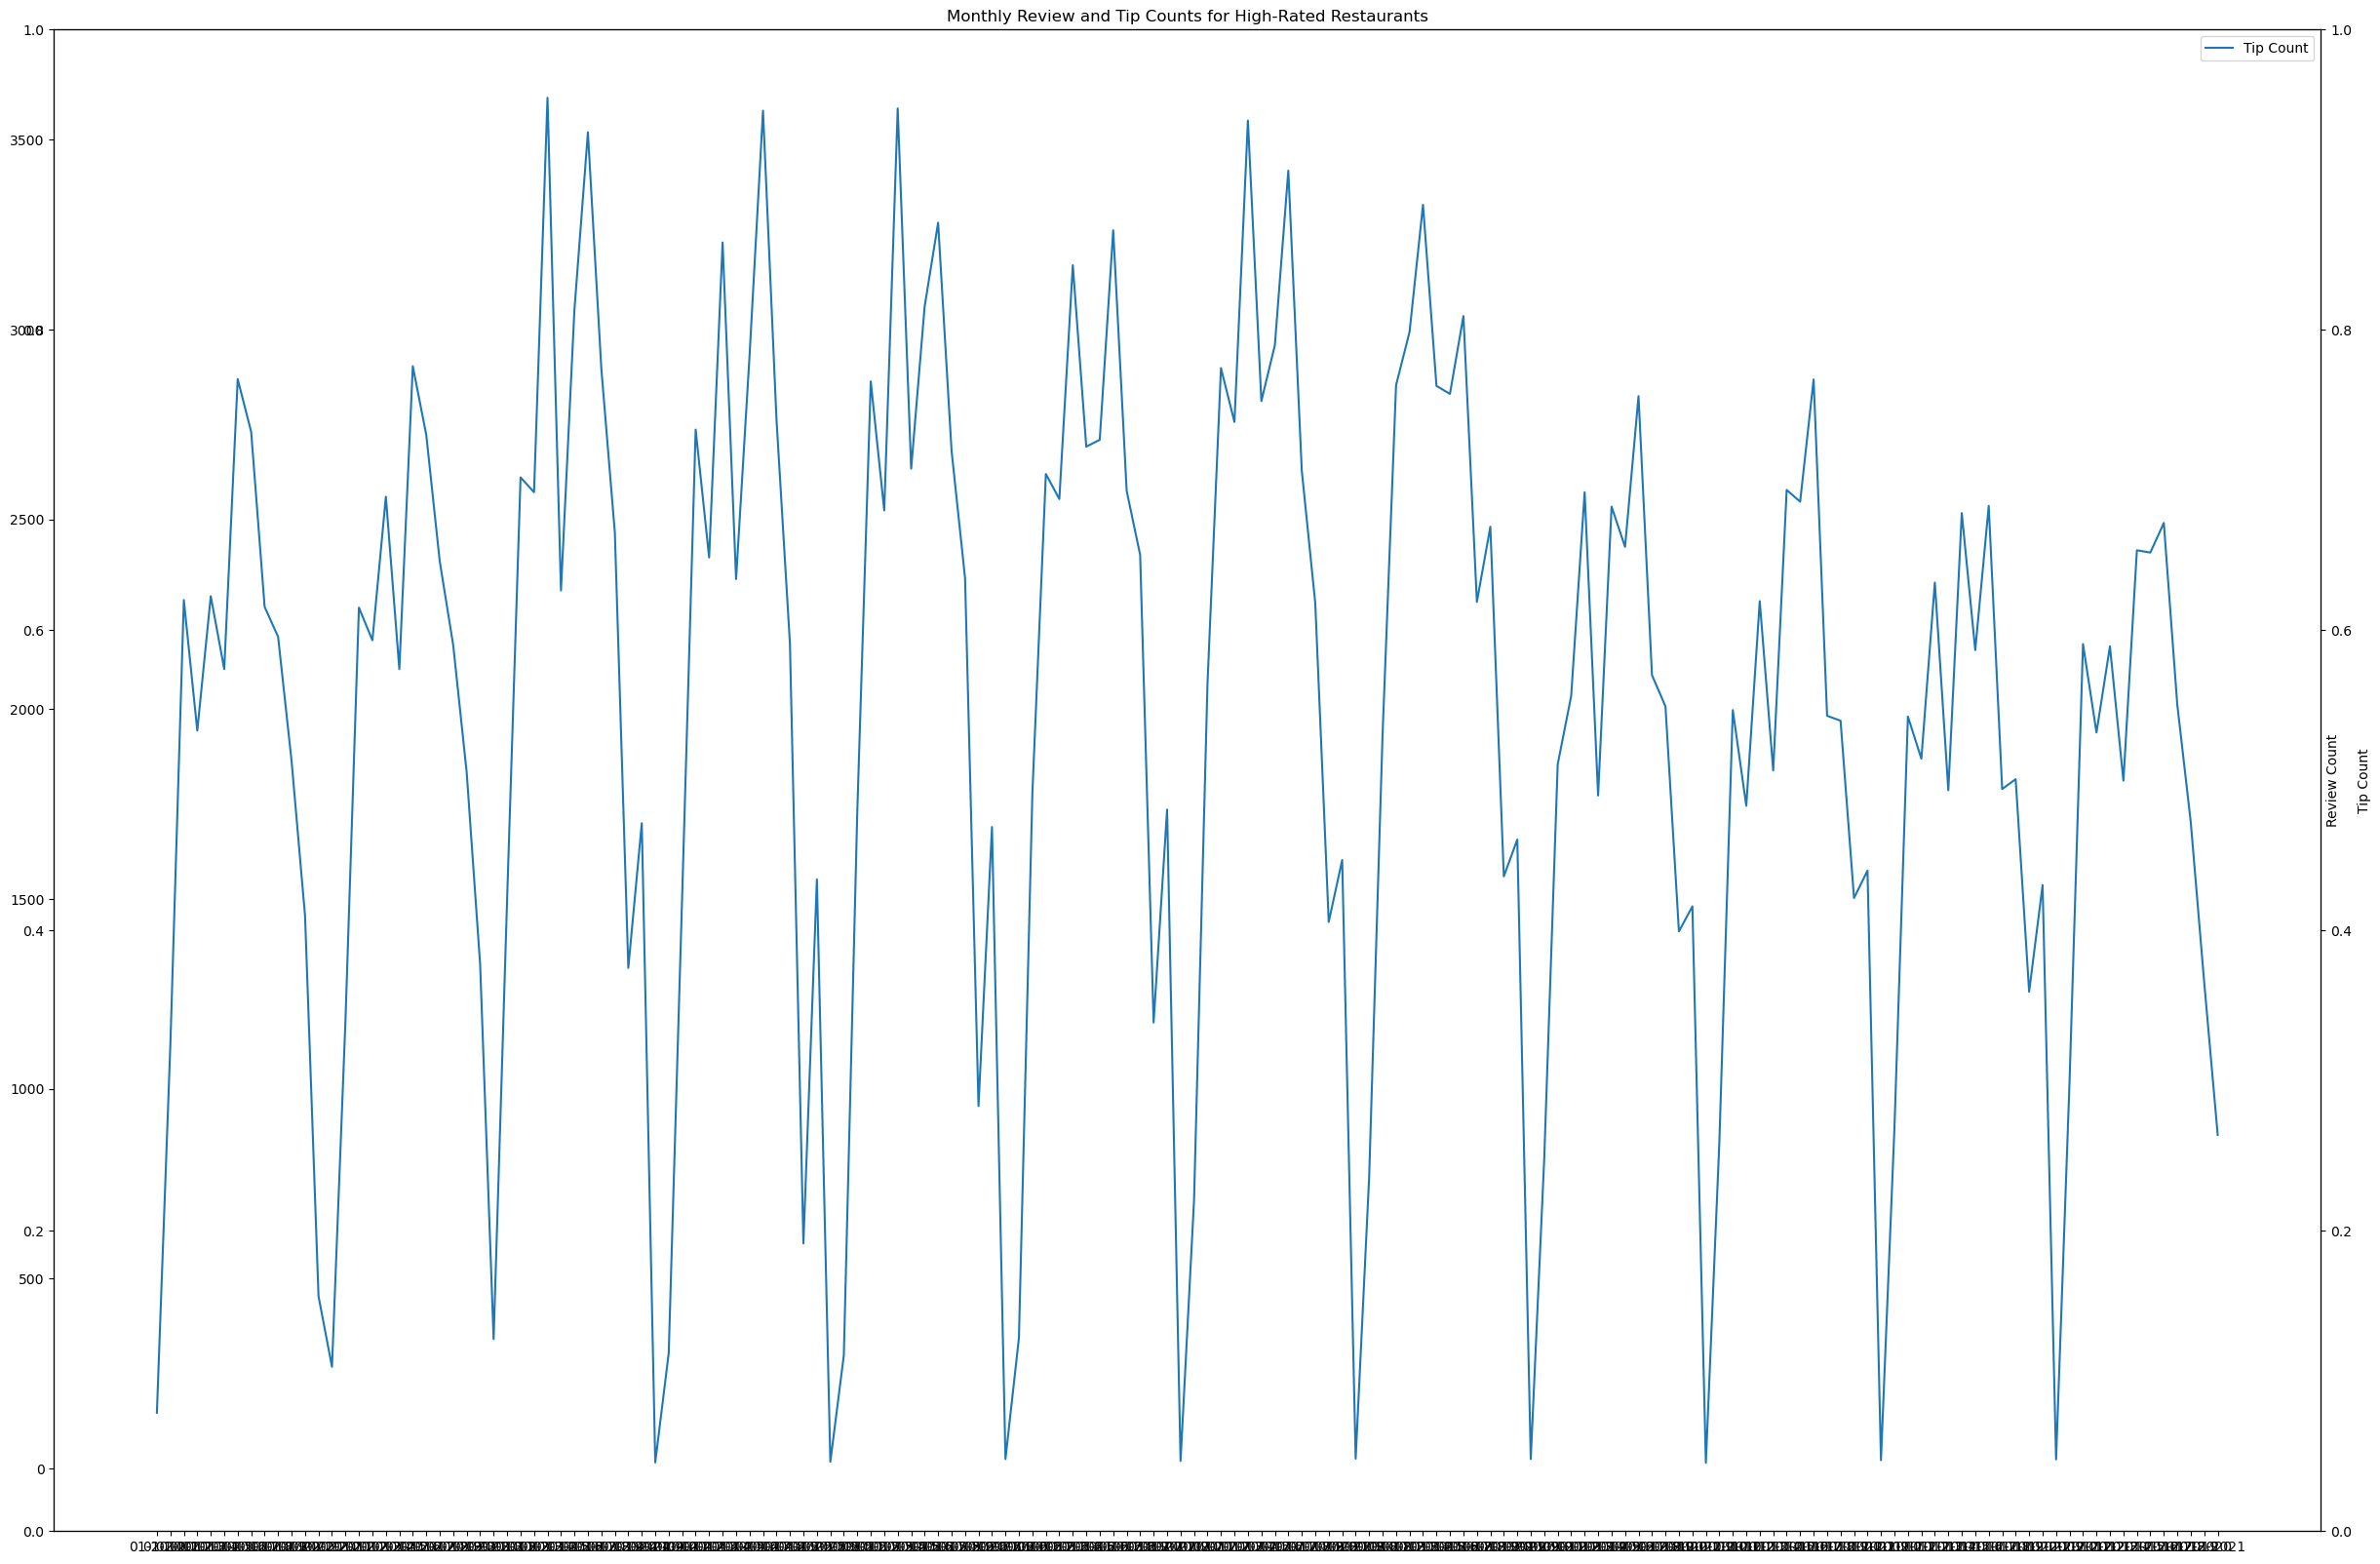

In [70]:
plt.figure(figsize=(30, 20))

sns.lineplot(data=high_rated_restaurant, x='month_year', y='tip_count', label='Tip Count',ax = plt.gca().twinx())
plt.title('Monthly Review and Tip Counts for High-Rated Restaurants')
plt.xlabel('Month-Year')
plt.ylabel('Review Count')
plt.gca().twinx().set_ylabel('Tip Count')

In [72]:
# Tip count and review count of high rated ,avreage rated and low rated restaurant

high_rated_restaurant = pd.read_sql_query(f"""
SELECT
    review.month_year,
    review.review_count,
    tip.tip_count
FROM
    (SELECT
        strftime('%m-%Y', date) as month_year,
        COUNT(*) as review_count
     FROM review
     WHERE business_id IN {tuple(business_id['business_id'])} AND stars > 3.5 AND date >= '2020-01-01'
     GROUP BY month_year
     ORDER BY month_year) as review
JOIN
    (SELECT
        strftime('%m-%Y', tip.date) as month_year,
        COUNT(*) as tip_count
     FROM tip
     JOIN business as b ON tip.business_id = b.business_id
     WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars > 3.5 AND date >= '2020-01-01'
     GROUP BY month_year
     ORDER BY month_year) as tip
ON review.month_year = tip.month_year;
""", connect)

# Display the results
high_rated_restaurant






,month_year,review_count,tip_count
0,01-2020,28610,1864
1,01-2021,20910,1456
2,01-2022,14302,454
3,02-2020,29358,1834
4,02-2021,19635,1328
5,03-2020,19799,1319
6,03-2021,24085,1700
7,04-2020,9069,593
8,04-2021,23536,1552
9,05-2020,12978,955


In [73]:
AVG_rated_restaurant = pd.read_sql_query(f"""
SELECT
    review.month_year,
    review.review_count,
    tip.tip_count
FROM
    (SELECT
        strftime('%m-%Y', date) as month_year,
        COUNT(*) as review_count
     FROM review
     WHERE business_id IN {tuple(business_id['business_id'])} AND stars <= 3.5 AND stars > 2.5 AND date >= '2020-01-01'
     GROUP BY month_year
     ORDER BY month_year) as review
JOIN
    (SELECT
        strftime('%m-%Y', tip.date) as month_year,
        COUNT(*) as tip_count
     FROM tip
     JOIN business as b ON tip.business_id = b.business_id
     WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars <= 3.5 AND b.stars > 2.5 AND date >= '2020-01-01'
     GROUP BY month_year
     ORDER BY month_year) as tip
ON review.month_year = tip.month_year;
""", connect)

# Display the results
AVG_rated_restaurant




,month_year,review_count,tip_count
0,01-2020,3971,580
1,01-2021,2229,389
2,01-2022,1704,125
3,02-2020,3862,565
4,02-2021,2148,384
5,03-2020,2348,407
6,03-2021,2838,468
7,04-2020,798,187
8,04-2021,2903,451
9,05-2020,1280,303


In [74]:

low_rated_restaurant = pd.read_sql_query(f"""
SELECT
    review.month_year,
    review.review_count,
    tip.tip_count
FROM
    (SELECT
        strftime('%m-%Y', date) as month_year,
        COUNT(*) as review_count
     FROM review
     WHERE business_id IN {tuple(business_id['business_id'])} AND stars <= 2.5 AND date >= '2020-01-01'
     GROUP BY month_year
     ORDER BY month_year) as review
JOIN
    (SELECT
        strftime('%m-%Y', tip.date) as month_year,
        COUNT(*) as tip_count
     FROM tip
     JOIN business as b ON tip.business_id = b.business_id
     WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars <= 2.5 AND date >= '2020-01-01'
     GROUP BY month_year
     ORDER BY month_year) as tip
ON review.month_year = tip.month_year;
""", connect)

# Display the results
low_rated_restaurant

,month_year,review_count,tip_count
0,01-2020,8577,142
1,01-2021,5812,89
2,01-2022,4641,40
3,02-2020,8811,118
4,02-2021,5828,89
5,03-2020,5261,95
6,03-2021,8008,97
7,04-2020,2932,44
8,04-2021,8236,102
9,05-2020,4463,67


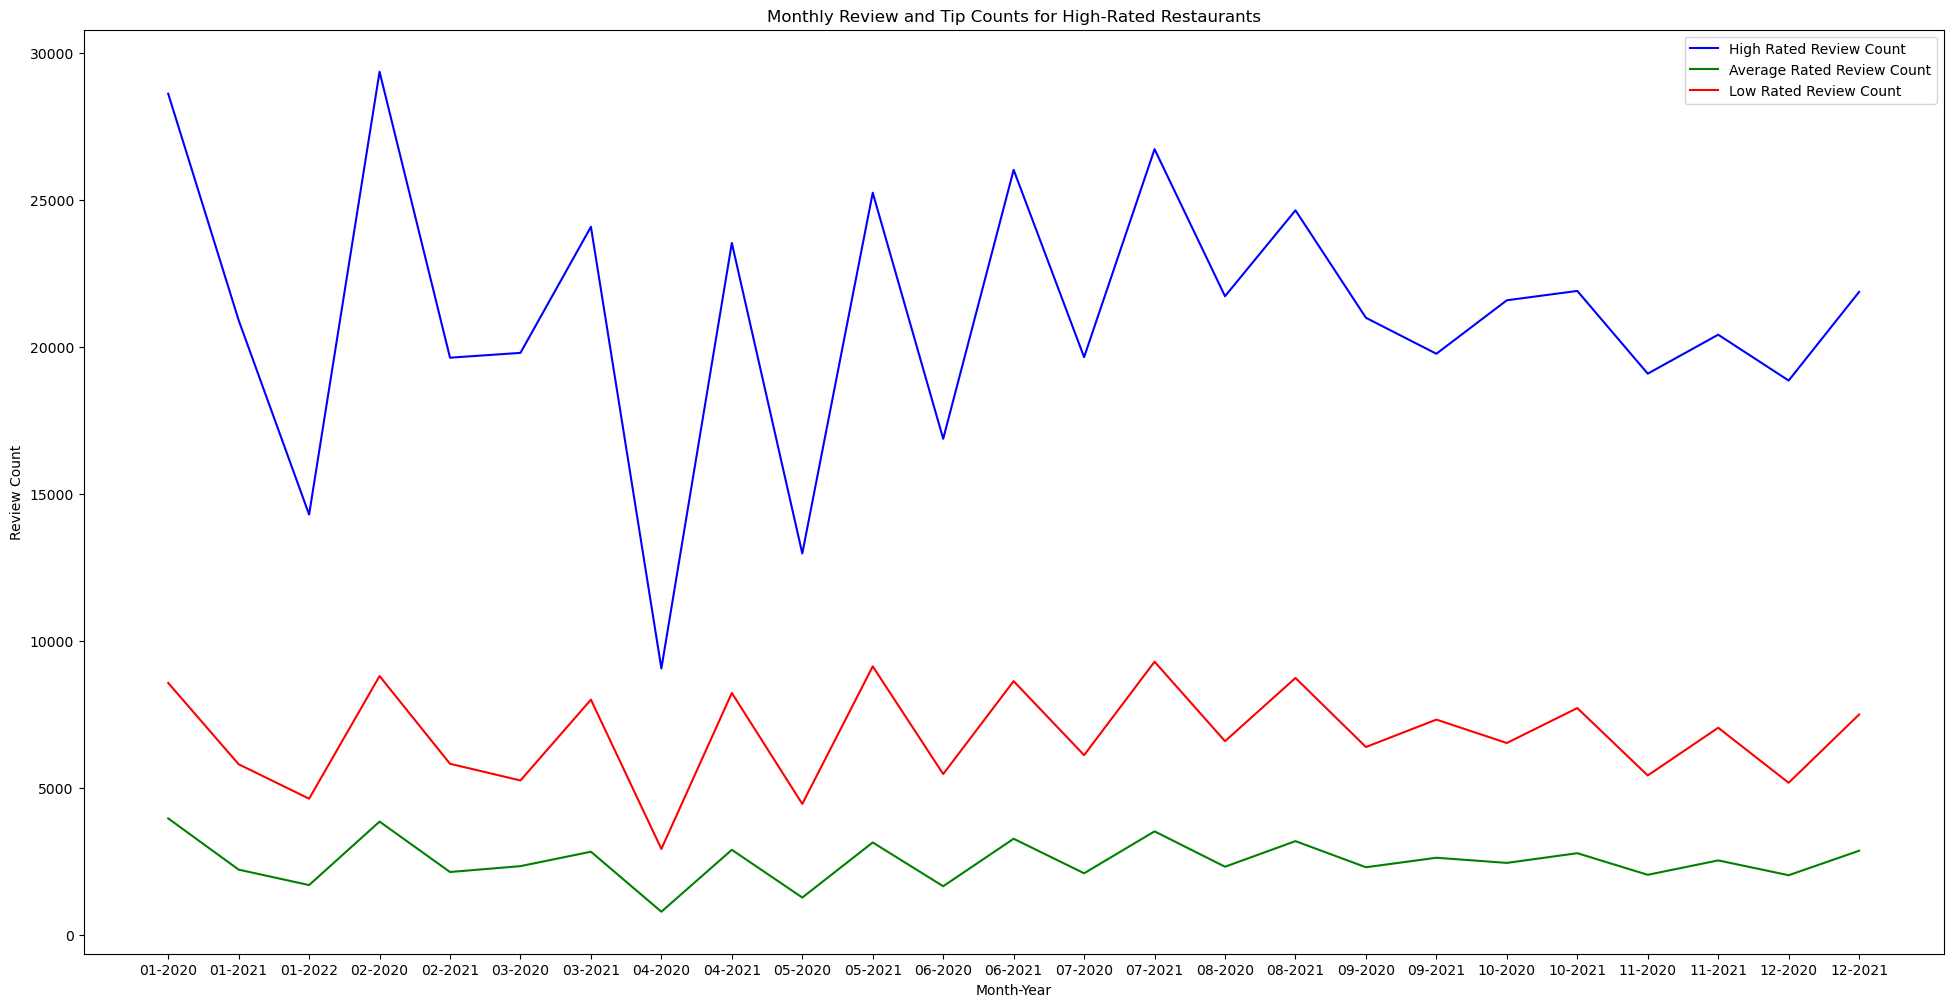

In [75]:
plt.figure(figsize=(24, 12))

sns.lineplot(data = high_rated_restaurant, x='month_year', y='review_count', label='High Rated Review Count', color='blue')
sns.lineplot(data=AVG_rated_restaurant, x='month_year', y='review_count', label='Average Rated Review Count', color='green')
sns.lineplot(data=low_rated_restaurant, x='month_year', y='review_count', label='Low Rated Review Count', color='red')


plt.title('Monthly Review and Tip Counts for High-Rated Restaurants')
plt.xlabel('Month-Year')
plt.ylabel('Review Count')
plt.show()

#  elite users

In [76]:
# elite user details and contribution

elite_df = pd.read_sql_query(f"""
SELECT
    elite,
    COUNT(*) as row_count,
    SUM(review_count) as total_review_count
FROM
    (SELECT
        CASE
            WHEN elite = '' THEN 'NOT Elite'
            ELSE 'ELITE'
        END AS elite,
        u.review_count
    FROM
        user u) as user_elite
GROUP BY
    elite
""",connect)

In [77]:
elite_df

,elite,row_count,total_review_count
0,ELITE,91198,20484441
1,NOT Elite,1896699,26021235


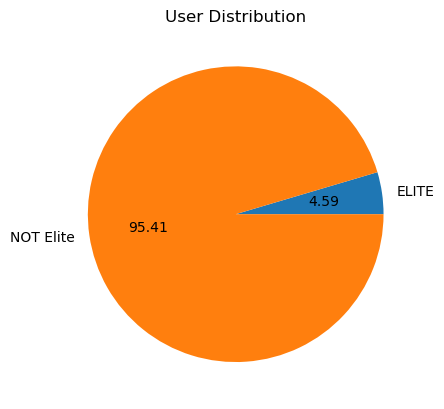

In [79]:
plt.pie(elite_df['row_count'], labels = elite_df['elite'] , autopct = '%.2f')
plt.title('User Distribution')
plt.show()

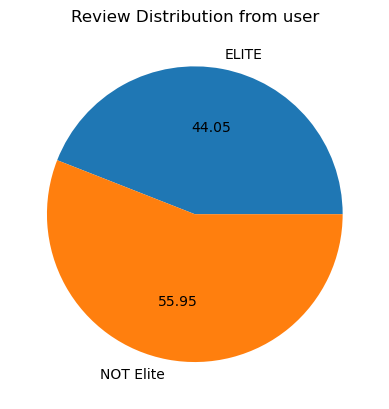

In [80]:
plt.pie(elite_df['total_review_count'],labels = elite_df['elite'] , autopct = '%.2f')
plt.title("Review Distribution from user")
plt.show()

# Rush Hour

In [82]:
# Rush hour calculation

review_engagement = pd.read_sql_query("""
SELECT
    cast (strftime('%H',date) as integer)
    as hour,
    COUNT(*) AS review_count
FROM
    review
GROUP BY
    hour;
""", connect)
review_engagement


,hour,review_count
0,0,460765
1,1,457189
2,2,416472
3,3,339935
4,4,248771
5,5,162636
6,6,100730
7,7,60031
8,8,38078
9,9,30389


In [83]:
tip_engagement = pd.read_sql_query("""
SELECT
    cast (strftime('%H',date) as integer) 
    as hour,
    COUNT(*) AS tip_count
FROM
    tip
GROUP BY
    hour;
""", connect)

tip_engagement


,hour,tip_count
0,0,74238
1,1,67568
2,2,54532
3,3,40093
4,4,27227
5,5,16977
6,6,10564
7,7,6428
8,8,4213
9,9,3399


In [86]:

checkin = pd.read_sql_query("SELECT date FROM checkin", connect)


checkin_engagement = []
for row in checkin.itertuples():
    dates = row.date.split(',') 
    for date_str in dates:
        if date_str.strip(): 
            date_obj = datetime.strptime(date_str.strip(), "%Y-%m-%d %H:%M:%S")
            checkin_engagement.append((date_obj.strftime("%H"),))
checkin_engagement_df = pd.DataFrame(checkin_engagement, columns=['hour'])
checkin_engagement_df = checkin_engagement_df.groupby('hour').size().reset_index(name='checkin_count')
checkin_engagement_df


,hour,checkin_count
0,00,1155092
1,01,935985
2,02,669574
3,03,437035
4,04,264905
5,05,152476
6,06,85066
7,07,52295
8,08,35589
9,09,37079


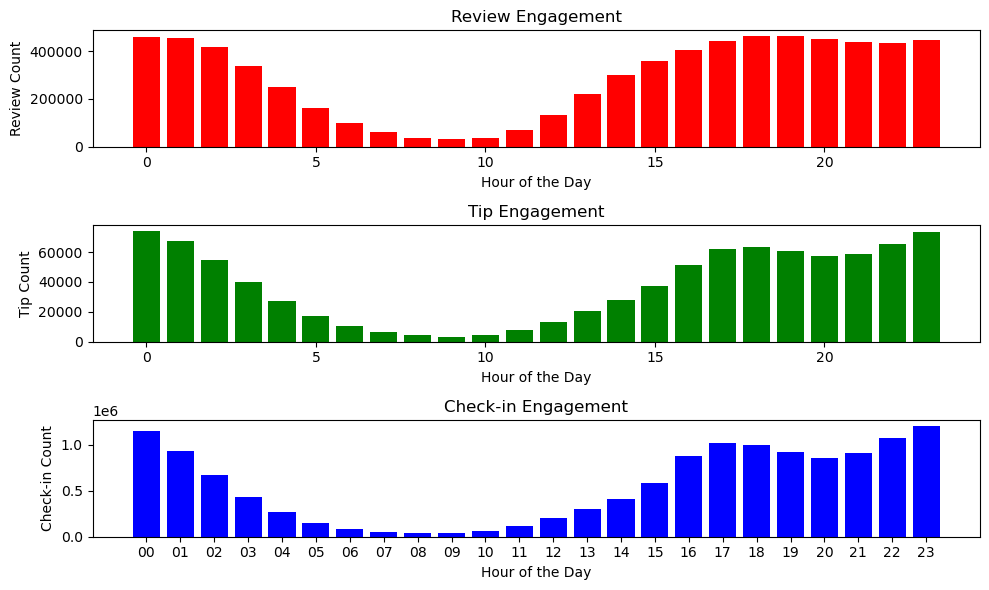

In [279]:
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.title("Review Engagement")
plt.bar(review_engagement['hour'],review_engagement['review_count'], color = 'RED')
plt.xlabel('Hour of the Day')
plt.ylabel('Review Count')

plt.subplot(3,1,2)
plt.title("Tip Engagement")
plt.bar(tip_engagement['hour'],tip_engagement['tip_count'], color = 'GREEN')
plt.xlabel('Hour of the Day')
plt.ylabel('Tip Count')

plt.subplot(3, 1, 3)
plt.title("Check-in Engagement")
plt.bar(checkin_engagement_df['hour'], checkin_engagement_df['checkin_count'], color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Check-in Count')

plt.tight_layout() 

plt.show()